In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#load data
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
#create dummy variables
house_df = pd.concat([house_df,pd.get_dummies(house_df.mszoning, prefix='mszoning', drop_first=True)], axis=1)
zoning_column_names = list(pd.get_dummies(house_df.mszoning, prefix='mszoning', drop_first=True).columns)
house_df['street_access'] = pd.get_dummies(house_df.street, drop_first=True)
house_df['has_AC'] = pd.get_dummies(house_df.centralair, drop_first=True)
house_df = pd.concat([house_df,pd.get_dummies(house_df.kitchenqual, prefix='kitchenqual', drop_first=True)], axis=1)
kitchen_column_names = list(pd.get_dummies(house_df.kitchenqual, prefix='kitchenqual', drop_first=True).columns)

In [4]:
#target variable
Y = house_df['saleprice']
#define feature set
X = house_df[['overallqual', 'totalbsmtsf', 'firstflrsf','grlivarea', 'garagecars', 'garagearea', 
             'street_access', 'has_AC'] + zoning_column_names + kitchen_column_names]
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

#define linear model
X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     290.3
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:34:15   Log-Likelihood:                -13912.
No. Observations:                1168   AIC:                         2.786e+04
Df Residuals:                    1152   BIC:                         2.794e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.978e+04   2.15e+04     -0.922      0.357   -6.19e+04    2.23e+04
overallqual     1.897e+04   1329.079     14.277      0.000    1.64e+04    2.16e+04
totalbsmtsf       16.1444      4.386      3.681      0.000       7.539      24.749
firstflrsf         4.0175      5.260      0.764      0.445      -6.302      14.337
grlivarea         42.7676      2.839     15.066      0.000      37.198      48.337
garagecars        1.5e+04   3274.984      4.581      0.000    8578.520    2.14e+04
garagearea         8.2374     11.082      0.743      0.457     -13.505      29.980
street_access  -1.359e+04   1.66e+04     -0.820      0.413   -4.61e+04     1.9e+04
has_AC          1.022e+04   4852.390      2.106      0.035     697.906    1.97e+04
mszoning_FV     2.102e+04   1.44e+04      1.458      0.145   -7268.080    4.93e+04
mszoning_RH     1.236e+04   1.64e+04      0.755      0.450   -1.97e+04    4.45e+04
mszoning_RL     2.473e+04   1.34e+04      1.844      0.065   -1582.588     5.1e+04
mszoning_RM     4630.2863   1.35e+04      0.343      0.732   -2.19e+04    3.12e+04
kitchenqual_Fa -5.347e+04   9014.260     -5.932      0.000   -7.12e+04   -3.58e+04
kitchenqual_Gd -4.677e+04   4755.961     -9.835      0.000   -5.61e+04   -3.74e+04
kitchenqual_TA -5.862e+04   5356.107    -10.945      0.000   -6.91e+04   -4.81e+04
==============================================================================
Omnibus:                      437.482   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41729.211
Skew:                          -0.750   Prob(JB):                         0.00
Kurtosis:                      32.244   Cond. No.                     6.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Assess the goodness of fit of your model.

The F-statistic of this model is 290.3. The R-squared value of this model is 0.791 and the adjusted R-squared value of this model is 0.788. The AIC score is 2.786e+04 and the BIC score is 2.794e+04. This is a good start for a model, although there is some room for improvement.

Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

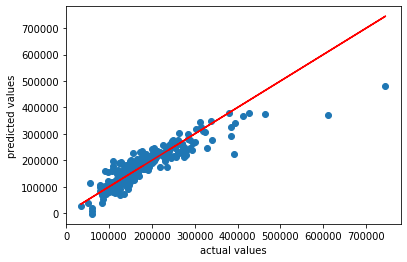

Mean absolute error of the prediction is: 23453.890959942924
Mean squared error of the prediction is: 1324791060.0519335
Root mean squared error of the prediction is: 36397.679322340504
Mean absolute percentage error of the prediction is: 14.081455488212704


In [5]:
#add constant
X_test = sm.add_constant(X_test)

#make predictions
predictions = results.predict(X_test)

#plot predictions
plt.scatter(Y_test, predictions)
plt.plot(Y_test, Y_test, color='red')
plt.xlabel('actual values')
plt.ylabel("predicted values")
plt.show()

#describe errors
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(Y_test, predictions)))
print('Mean squared error of the prediction is: {}'.format(mse(Y_test, predictions)))
print('Root mean squared error of the prediction is: {}'.format(rmse(Y_test, predictions)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((Y_test - predictions) / Y_test)) * 100))

Is the performance of your model satisfactory? Why?

The mean absolute error of the house sale price predictions is about 23,400 dollars. This translates to a mean absolute percentage error of about 14%. This could be considered satisfactory performance; however, from the plot above, it is clear that the predictions are not as accurate for more expensive homes, so there is room for improvement within the model.

* Try to improve your model in terms of predictive performance by adding or removing some variables.

In [6]:
#define interaction of quality and ground floor living area
house_df['qual_area'] = house_df['overallqual'] * house_df['grlivarea']
#add interaction term to feature set
X2 = house_df[['overallqual', 'totalbsmtsf', 'firstflrsf','grlivarea', 'garagecars', 'garagearea', 
             'street_access', 'has_AC', 'qual_area'] + zoning_column_names + kitchen_column_names]
#target variable
Y2 = house_df['saleprice']

#split data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

#define linear model
X_train2 = sm.add_constant(X_train2)

results2 = sm.OLS(Y_train2, X_train2).fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     280.4
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:34:16   Log-Likelihood:                -13898.
No. Observations:                1168   AIC:                         2.783e+04
Df Residuals:                    1151   BIC:                         2.792e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.236e+04   2.34e+04      1.385      0.166   -1.35e+04    7.82e+04
overallqual     9638.4359   2195.010      4.391      0.000    5331.766    1.39e+04
totalbsmtsf       12.7624      4.381      2.913      0.004       4.166      21.359
firstflrsf         6.3362      5.217      1.215      0.225      -3.900      16.572
grlivarea         -0.2790      8.580     -0.033      0.974     -17.113      16.555
garagecars      1.788e+04   3281.924      5.447      0.000    1.14e+04    2.43e+04
garagearea        -1.8550     11.117     -0.167      0.868     -23.667      19.957
street_access  -1.419e+04   1.64e+04     -0.866      0.387   -4.64e+04     1.8e+04
has_AC          1.202e+04   4808.079      2.499      0.013    2583.681    2.15e+04
qual_area          6.3548      1.197      5.309      0.000       4.006       8.703
mszoning_FV     2.528e+04   1.43e+04      1.771      0.077   -2725.240    5.33e+04
mszoning_RH     1.778e+04   1.62e+04      1.097      0.273    -1.4e+04    4.96e+04
mszoning_RL     2.746e+04   1.33e+04      2.070      0.039    1433.557    5.35e+04
mszoning_RM     6586.2986   1.34e+04      0.493      0.622   -1.96e+04    3.28e+04
kitchenqual_Fa -4.952e+04   8940.818     -5.538      0.000   -6.71e+04    -3.2e+04
kitchenqual_Gd  -4.07e+04   4837.901     -8.413      0.000   -5.02e+04   -3.12e+04
kitchenqual_TA -5.289e+04   5402.872     -9.790      0.000   -6.35e+04   -4.23e+04
==============================================================================
Omnibus:                      797.538   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101405.950
Skew:                          -2.233   Prob(JB):                         0.00
Kurtosis:                      48.428   Cond. No.                     3.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

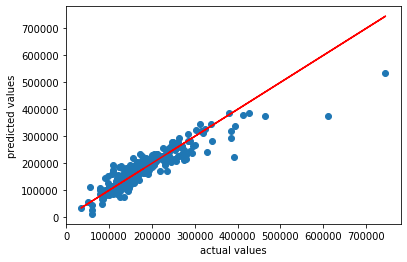

Mean absolute error of the prediction is: 22160.185244208686
Mean squared error of the prediction is: 1159009450.6297526
Root mean squared error of the prediction is: 34044.22786067783
Mean absolute percentage error of the prediction is: 12.960373560394217


In [7]:
#add constant
X_test2 = sm.add_constant(X_test2)

#make predictions
predictions2 = results2.predict(X_test2)

#plot predictions
plt.scatter(Y_test2, predictions2)
plt.plot(Y_test2, Y_test2, color='red')
plt.xlabel('actual values')
plt.ylabel("predicted values")
plt.show()

#describe errors
print('Mean absolute error of the prediction is: {}'.format(mean_absolute_error(Y_test2, predictions2)))
print('Mean squared error of the prediction is: {}'.format(mse(Y_test2, predictions2)))
print('Root mean squared error of the prediction is: {}'.format(rmse(Y_test2, predictions2)))
print('Mean absolute percentage error of the prediction is: {}'.format(np.mean(np.abs((Y_test2 - predictions2) / Y_test2)) * 100))

After adding the interaction between overall quality and ground floor square footage to the model, the mean absolute error of the predictions decreased to 22,160, and the mean absolute percentage error of the prediction decreased to about 13%. This model is still less accurate for expensive houses.